# D208 Predictive Modeling: Performance Assessment - NBM3 Task 2 Logistic Regression Modeling
## Edward Wu (Student ID 010870448)
### 04/26/2024
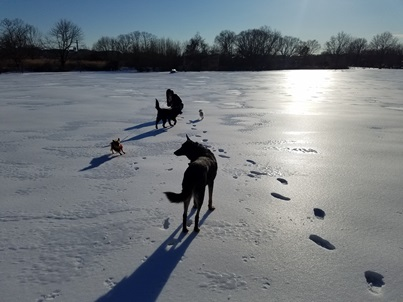

## Part 1 Research Question
### A1 Research Question
&nbsp;&nbsp;&nbsp;&nbsp; For this performance assessment we will be attempting to answer the following question: "Which factors affect if a customer will churn within this company."  We will be working on the telecommunications data set provided by WGU's D208 website in the form of the file **churn_clean.csv**.  We will be attempting to use **logistic regression** on the **categorical variable 'Churn'** which will act as the **dependent variable**.

### A2 Goals
&nbsp;&nbsp;&nbsp;&nbsp; The goal of this research is to help stakeholders try to identify what variables can reliably predict churn to help with company retention.  We will be attempting to answer our research question by modeling with the following **independent variables**: 

>>
Quantitative variables: 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'

>>
Qualitative variables: 'Techie', 'TechSupport', 'PaperlessBilling'

This research is relevant for stakeholders because identifying factors for churn is valuable information that assists the company to design products or strategies to help with retention by targeting specific segments of the market.  Customer retention is a well known issue within the telecommunications business and being able to identify this churning market segment is the first step in addressing retention issues.

## Part 2 Method Justification
### B1 Summary of Assumptions
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; According to Dr. Keiona Middleton of Western Governors University (2022), a linear regression model is a statistical tool used to model the relationship of a dependent variable (also called response variable) with the independent variable (also called explanatory variable) based on a linear relationship between the variables.  For this performance assessment we will be using the **logistic regression** model for prediction, which means that there will be multiple independent variables used to train the model and for predictions and a dependent variable that categorical in nature.  In our case, the variable **Churn** is categorical and binary, with response values of either **Yes** or **No**.  According to Dr. William Sewell (n.d.) of Western Governors University, the logistic regression model must follow the assumptions of linear regression: that there is a linear relationship betwen the dependent variable and the independent variables, that the observations in the data are independent of one another, and that independent variables are not too highly correlated with each other which is called multicollinearity.  In addition to this, Dr. Sewell states there are four more assumptions for the logistic regression model:  **First**, It is based on the Bernoulli distribution rather than Gaussian because the dependent variable is binary.  **Second**, the predicted values are restricted to a range of nominal values like 'Yes/No', or 'S,M,L'.  **Third**, It predicts the probability of particular outcomes rather than the outcome itself.  **Fourth**, it is the logarithm of the odds of achieving 1.

### B2 Tool Benefits
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Python is a powerful programming language that offers easy to read syntax and is readily deployed in the real world setting as seen by its steady adoption by many businesses.  For large scale data analysis, both Python and R are the preferred choice of programs.  According to Dr. Sewell (n.d.), R was designed for statistics so many of the basic functions needed for data analysis are loaded when you boot up the program.  While Python may lack these out of the box functions that R has, what makes Python a better choice and such a versatile tool is the fact that Python is very flexible as a general purpose program and can install any number of packages from libraries containing all the tools that the analyst would need for the job.  If a tool is needed for reading and manipulating large sets of data, Python can use **numpy** and **pandas**.  If a statistical package is needed for analysis, one can turn to **statsmodels** and **scipy** for their comprehensive statistical tools.  If a visualization is needed, then we can call on **matplotlib** and **seaborn** to create beautiful graphs that express the data in an easy to understand format.  Dr. Sewell (n.d.) also suggests using **warnings** to disable Python built in warning messages for the purpose of showing clean output for this performance assessment.

In [1]:
# Initialize Python by importing tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import logit
from statsmodels.graphics.mosaicplot import mosaic
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import pylab

### B3 Appropriate Technique
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Logistic Regression is the appropriate technique for analysis because we are using the categorical dependent variable **Churn** to try and model linear relationships with our independent variables.  Using logistic regression we will be able to find out which variables have the highest correlation or effect on churn and whether these relationships are positively or negatively correlated.  We can then use these insights to drive future business decisions.

## Part 3 Data Preparation
### C1 Data Cleaning
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; In order to ensure that the model we are creating is not influenced by data quality issues, we must first prepare and manipulate the data.  From WGU's D206 course we learned that the data preparation process can be broken down into three main goals: data cleaning, data exploration, and data wrangling.  The process of data cleaning can be further broken down into three parts, the detection and treatment of: duplicates, missing values, and outliers.  We started off the process by importing all the tools and libraries needed for this assessment, which include: numpy, pandas, matplotlib, seaborn, statsmodels, scipy, and warnings.  The specific packages used for data cleaning is **numpy** and **pandas**, with a few visualizations using **matplotlib** and **seaborn**.  Then we import the data from our **.csv** file and check to see if the data has been imported correctly and gaining an idea of how the data is structured by using the **.head()** method.  Once we verify that the dataframe is loaded properly, we go through the steps of identifying duplicates, missing values, and outliers.  Once these anomolies are found, we subsequently treat them depending on the type of anomoly found and in what situation we have.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Duplicates** refers to information which are duplicated across the entire row even though each row is supposed to represent different data points in the dataframe.  This causes a lot of problems during analysis and can cause heavy skewing.  For the treatment of duplicates we can either use **.drop_duplicates()** to completely drop the entire row of information, or we can impute the row with one of the statistical measures of central tendencies such as using the mean, median, or mode of each column if we wish to retain a data point.  In our case, since our dataframe contains 10,000 rows of data we may not wish to retain duplicated information since imputation runs its own risk of skewing information so we will drop all the duplicates if any are found.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The identification and treatment of **missing values** is a bit more nuanced simply due to the multitude of reasons why a missing value may be present in the data set.  Finding the missing value is simple, by using either the **.info()** or **.isna()** method.  Missing values may often times show up as **NaN** which means "not a number".  Determining how to treat missing values depends on the reasoning behind having a missing number.  If a value is missing because it was missing from the original data set, one could decide to treat similarly to the methods mentioned earlier for duplicates.  If we are working on a sufficiently large data set, we can drop the entire row of data.  If we find that our data set is lacking in sample size, we may also decide to impute values to the missing values using one of the measures of central tendencies such as mean, median, or mode.  There are many other reasons why missing values may be present which is why exploration into the data is necessary to further determine what steps will be needed to treat any missing values if there are any.

##### Loading dataframe from csv and initial cleaning procedures

In [2]:
# importing data by reading csv into a data frame
df = pd.read_csv('churn_clean.csv')

In [3]:
# Using .head() to verify the file loaded properly
print(df.head())

   CaseOrder Customer_id                           Interaction  \
0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

                                UID         City State                 County  \
0  e885b299883d4f9fb18e39c75155d990  Point Baker    AK  Prince of Wales-Hyder   
1  f2de8bef964785f41a2959829830fb8a  West Branch    MI                 Ogemaw   
2  f1784cfa9f6d92ae816197eb175d3c71      Yamhill    OR                Yamhill   
3  dc8a365077241bb5cd5ccd305136b05e      Del Mar    CA              San Diego   
4  aabb64a116e83fdc4befc1fbab1663f9    Needville    TX              Fort Bend   

     Zip       Lat        Lng  ...  MonthlyCharge Bandwidth_GB_Year Item1  \
0  99927  56.25100 -133.37571  ...     

##### Data Cleaning Steps to check for nulls and duplicates

In [4]:
# Detecting duplicates of each row
# using .duplicated() with .value_counts() to
# indicate how many are duplicated
print(df.duplicated().value_counts())

False    10000
Name: count, dtype: int64


In [5]:
# To show understanding of the subject we can use .drop_duplicates()
# and repeat the duplicated().value_counts() to show no duplicates
# First create another df to manipulate and hold cleaned data
clean_df = df.copy(deep=True)

In [6]:
# REDUNDANT STEP
# Then we perform the method to drop duplicates and check for count
clean_df.drop_duplicates()
print(clean_df.duplicated().value_counts())

False    10000
Name: count, dtype: int64


In [7]:
# Assessing data quality with .info() to see
# data types and non-null count
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [8]:
# Detecting missing values for each variable
# using the isna() to show null variables
# and using .sum() to add the results to show
# how many per column are missing
clean_df.isna().sum()

CaseOrder                  0
Customer_id                0
Interaction                0
UID                        0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
TimeZone                   0
Job                        0
Children                   0
Age                        0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                     0
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                      0
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport   

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The '.duplicated().value_counts()' method we employed came back with 10,000 false counts, meaning there are no duplicated rows within our data set.  Even so, we create a copy of the dataframe and rename it to **clean_df** to house cleaned data that we will later export into .csv file for submission.  We also run the **.drop_duplicates()** method to drop the (non-existant) duplicates and come back with another count of 10,000 false counts, meaning duplicates do not exist within this new **clean_df** dataframe.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; When we then run the **.info()** method, we find that every column is populated with 10,000 values except for **'InternetService'** which only contains 7,871 non-null values.  This means that there are **2,129 missing values** in this variable, a number we can confirm by running **.isna().sum()** which outputs the same number of missing values.  This missing information will need to be addressed in the following section.  First we must explore this variable to understand why the value is missing.  We thus run **.unique()** to find out what unique values are contained within the data.

In [9]:
print(clean_df['InternetService'].unique())

['Fiber Optic' 'DSL' nan]


In [10]:
# Printing .head(10) can let us take a peek at how these
# NaN values look within the pandas Dataframe
print(clean_df['InternetService'].head(10))

0    Fiber Optic
1    Fiber Optic
2            DSL
3            DSL
4    Fiber Optic
5            NaN
6            DSL
7            DSL
8            DSL
9    Fiber Optic
Name: InternetService, dtype: object


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Upon exploring the .csv file in Excel, we can see that there are three unique values that are supposed to be within the variable "InternetService": they are 'Fiber Optic', 'DSL', and 'None'.  From the results of running **.unique()**, we can conclude that 'None' was improperly read from the .csv and loaded into the dataframe as a 'NaN', which represents a missing value while the string 'None' is meant to represent a data point indicating that the customer did not sign up for internet service.  The fix for this is very simple as we can simply fill in all the missing values with the string 'None' which will conclude the treatment for missing values and duplicates.  We will be using the **.fillna()** method to replace all missing values with 'None'.  As a side note, if the missing value were from a variable with numeric values, we could impute the missing values by using the same **.fillna()** method and replacing the missing value with either the mean, median, or mode by using the **'.mean()', '.median()', or '.mode()'** methods.  An example of how this would look would be: *"df['Tenure'].fillna(df['Tenure'].mean(), inplace=True)"*.

In [11]:
# Replacing missing values within 'InternetService' variable
# by using .fillna() to replace NaN with "None"
clean_df['InternetService'].fillna('None', inplace=True)
# printing first 10 lines to see if missing value was replaced
print(clean_df['InternetService'].head(10))

0    Fiber Optic
1    Fiber Optic
2            DSL
3            DSL
4    Fiber Optic
5           None
6            DSL
7            DSL
8            DSL
9    Fiber Optic
Name: InternetService, dtype: object


In [12]:
# Run .unique() to confirm 'None' instead of NaN
print(clean_df['InternetService'].unique())

['Fiber Optic' 'DSL' 'None']


In [13]:
# Confirm clean_df no longer has missing values
clean_df.isna().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

##### Finding Outliers

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The last step of data cleaning is the identification of **outliers**.  While not technically an outlier, a data quality issue was found during the search for outliers.  After careful consideration of the datatypes within this data set, we also find that all the data types of "object", "int64", and "float64" match the variables that they are supposed to represent aside from the variable "Zip", which represents the 5 digit zip code used by the United States.  The variable "Zip" is saved as an "int64" which is incorrect because zip codes are 5 digit numbers that represent an area, there is no inherent value to the numbers themselves.  If the variable is saved as an integer, it will also remove all the "0" numbers in such a way that a zip code of "00123" will show up in the data set as "123".  While this **data wrangling** can be tackled in another step, we correct it to ensure all data quality issues are resolved for the sake of having clean data in the **clean_df** dataframe we will be exporting later . According to stackoverflow (2015) the way to treat this is to first change the data type to "object" by using '.astype(str)' to change the integer to a string which better reflects the categorical discrete nature of zip codes.  Afterwards we use the 'str.zfill()' method to fill the front of the string with zeroes to reach 5 digits necessary for zip code formatting.

In [14]:
# print a .head() of 'Zip' to see the incorrect data in action
print(clean_df['Zip'].head(15))

0     99927
1     48661
2     97148
3     92014
4     77461
5     31030
6     37847
7     73109
8     34771
9     45237
10    18830
11      783
12    52739
13     4228
14    60162
Name: Zip, dtype: int64


In [15]:
# Seen above in line 11 and 13 that zip codes with less than 5 numbers exist
# .astype() with str.zfill() to correct 'Zip'
clean_df['Zip'] = clean_df['Zip'].astype(str).str.zfill(5)
# print the result to confirm the fix
print(clean_df['Zip'].head(15))

0     99927
1     48661
2     97148
3     92014
4     77461
5     31030
6     37847
7     73109
8     34771
9     45237
10    18830
11    00783
12    52739
13    04228
14    60162
Name: Zip, dtype: object


The results show that line 11 and 13 have been fixed to include the '0' in front and the "dtype" shows "object" as it should be.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Next we go through the steps to identify outliers.  In D206 one of the methods we learned about to identify outliers is the use of visualizations such as boxplots and histograms.  While these visualizations will be repeated in a later section, we will perform there here as part of the step to identify outliers.  We can also look at the descriptive statistics of the data to gain an understanding of the data using **.describe()**.  We will be creating a separate data frame variable called **df_quant** while removing variables that contain numeric values containing customer self-surveyed answers, demographic information, or other identifiers: such as 'CaseOrder', 'Lat', 'Lng', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', and 'Item8'.  The variables contained in **df_quant** will also be the **quantitative variables** we will later be using for modeling.

In [16]:
# Using .describe() to find variables with numeric values
# and .columns to pull list of column names
print(clean_df.describe().columns)

Index(['CaseOrder', 'Lat', 'Lng', 'Population', 'Children', 'Age', 'Income',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')


In [17]:
# Separating the quantitative variables from demographic and survey-related variables and assigning to df_quant_outliers
df_quant = clean_df[['Population','Children','Age','Income','Outage_sec_perweek','Email',
                 'Contacts','Yearly_equip_failure','Tenure','MonthlyCharge','Bandwidth_GB_Year']]
# Use .describe() to provide initial statistical exploration 
print(df_quant.describe())

          Population    Children           Age         Income  \
count   10000.000000  10000.0000  10000.000000   10000.000000   
mean     9756.562400      2.0877     53.078400   39806.926771   
std     14432.698671      2.1472     20.698882   28199.916702   
min         0.000000      0.0000     18.000000     348.670000   
25%       738.000000      0.0000     35.000000   19224.717500   
50%      2910.500000      1.0000     53.000000   33170.605000   
75%     13168.000000      3.0000     71.000000   53246.170000   
max    111850.000000     10.0000     89.000000  258900.700000   

       Outage_sec_perweek         Email      Contacts  Yearly_equip_failure  \
count        10000.000000  10000.000000  10000.000000          10000.000000   
mean            10.001848     12.016000      0.994200              0.398000   
std              2.976019      3.025898      0.988466              0.635953   
min              0.099747      1.000000      0.000000              0.000000   
25%              8.

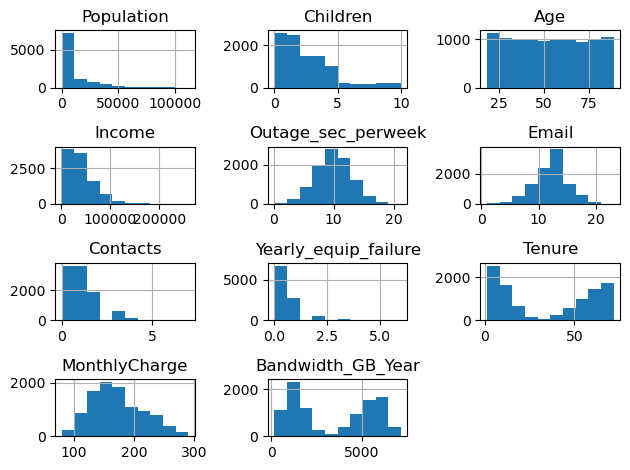

In [18]:
df_quant.hist()
plt.tight_layout()
plt.show()

<Axes: xlabel='Income'>

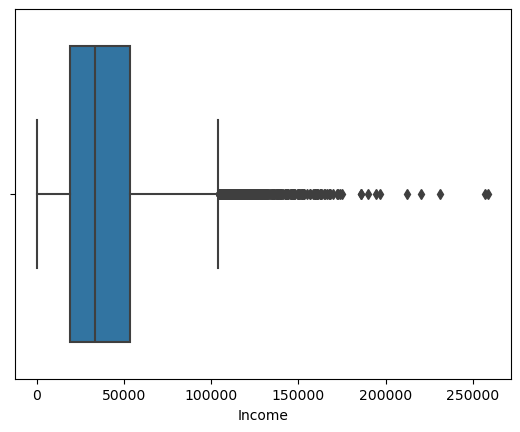

In [19]:
# Boxplot visualizations of continuous variables identified as datatype "float64"
sns.boxplot(x='Income',data=df_quant)

<Axes: xlabel='Outage_sec_perweek'>

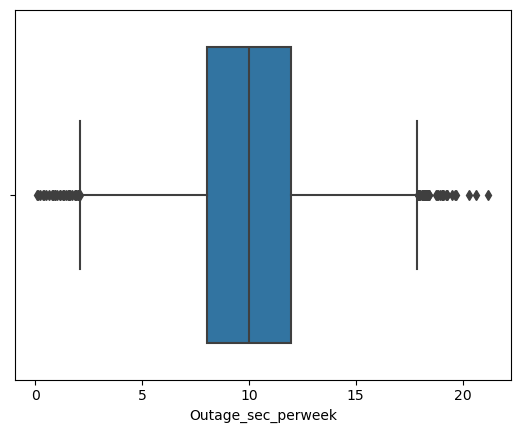

In [20]:
sns.boxplot(x='Outage_sec_perweek',data=df_quant)

<Axes: xlabel='Tenure'>

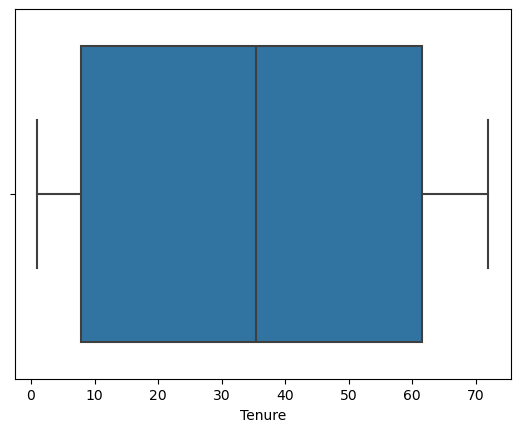

In [21]:
# Visualization of "Tenure”
sns.boxplot(x='Tenure',data=df_quant)

<Axes: xlabel='MonthlyCharge'>

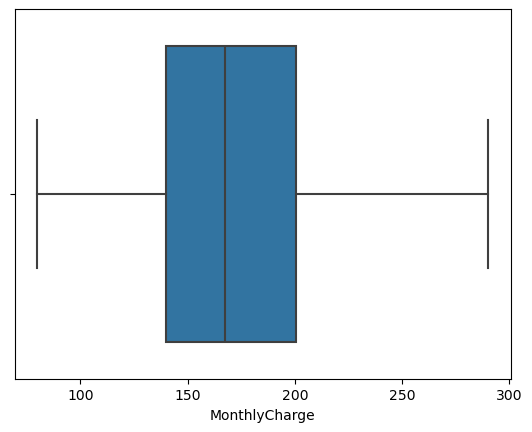

In [22]:
# Visualization of "MonthlyCharge”
sns.boxplot(x='MonthlyCharge',data=df_quant)

<Axes: xlabel='Bandwidth_GB_Year'>

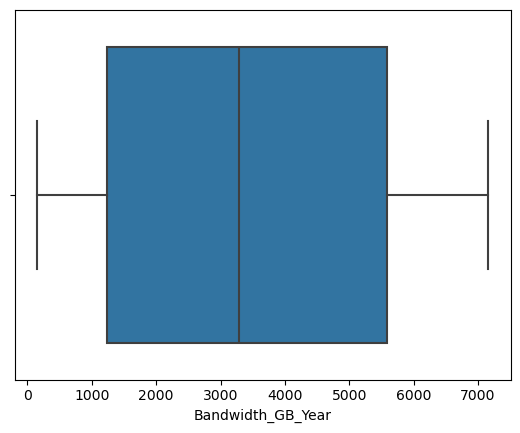

In [23]:
# Visualization of "Bandwidth_GB_Year”
sns.boxplot(x='Bandwidth_GB_Year',data=df_quant)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Based on the visualizations produced, we can see that there are some outliers in data set.  Looking at the summary statistics, we see there are **no overtly incorrect data** such as negative values.  When we look at the visualizations, we can see heavy skewing in some of the data.  While some have small pockets of data points at the tail ends.  This can be easily explained in certain variables such as 'Income', where most of the population falls under a certain income amount while a very small percentage of people have very high income.  'Tenure' is another great example of why a measure of central tendency does not accurately explain the data as seen in the visualization, this variable is bi-modal with peaks at opposite ends of the graph, which means customers are either very loyal and stay for very long periods of time or they leave very quickly.  Since these all data points are valid and imputing a measure of central tendency will add further weight to the skewed data, I have decided to **acknowledge the outliers but also to include them** in the data set instead of dropping or replacing them.

### C2 Summary Statistics
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; In this section we will be providing summary statistics for the variables that we will be using for modeling.  As mentioned earlier, these variables are as follows:

>>
Independent **(Categorical)** variable : 'Churn'

>>
Quantitative variables: 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'

>>
Qualitative variables: 'Techie', 'TechSupport', 'PaperlessBilling'

Some of the steps here will be a repeat of the previous **.describe()** operation performed on **df_quant** which houses the **quantitative variables** we are working with, including the independent variable 'Tenure'.  We will also be creating a new variable called  **df_qual** to house all the **qualitative variables** to perform a separate **.describe()**.  The reason why it is necessary to separate the quantitative and qualitative data is because the **.describe()** method can only perform one type of descriptive statistic function on any list of mixed variables and will not return both at once.

In [24]:
print(df_quant.describe())

          Population    Children           Age         Income  \
count   10000.000000  10000.0000  10000.000000   10000.000000   
mean     9756.562400      2.0877     53.078400   39806.926771   
std     14432.698671      2.1472     20.698882   28199.916702   
min         0.000000      0.0000     18.000000     348.670000   
25%       738.000000      0.0000     35.000000   19224.717500   
50%      2910.500000      1.0000     53.000000   33170.605000   
75%     13168.000000      3.0000     71.000000   53246.170000   
max    111850.000000     10.0000     89.000000  258900.700000   

       Outage_sec_perweek         Email      Contacts  Yearly_equip_failure  \
count        10000.000000  10000.000000  10000.000000          10000.000000   
mean            10.001848     12.016000      0.994200              0.398000   
std              2.976019      3.025898      0.988466              0.635953   
min              0.099747      1.000000      0.000000              0.000000   
25%              8.

In [25]:
df_qual = clean_df[['Churn', 'Techie', 'TechSupport', 'PaperlessBilling']]
print(df_qual.head())
print(df_qual.describe())

  Churn Techie TechSupport PaperlessBilling
0    No     No          No              Yes
1   Yes    Yes          No              Yes
2    No    Yes          No              Yes
3    No    Yes          No              Yes
4   Yes     No         Yes               No
        Churn Techie TechSupport PaperlessBilling
count   10000  10000       10000            10000
unique      2      2           2                2
top        No     No          No              Yes
freq     7350   8321        6250             5882


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The summary statistics results from the **quantitative variables** show that each variable has a uniform 10,000 data point from the output **count**.  The **mean** and **standard deviation** can be easily seen represented by the **mean** and **std** output respectively.  Next, the summary statistics show us the **range** through the **min** and **max** output which represents the lowest and highest value within the data.  Lastly we have the **interquartile ranges** which are shown by the **25%**, **50%**, and **75%** output and also coincides with the boxes shown in box and whisker plots.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The **.describe()** method performed on our **qualitative variables** outputs a different type of summary statistic and also show that each variable has a uniform 10,000 data points from the output **count**.  The output **unique** shows that each of the qualitative variables only has two unique values, which we can see from running **.head()** to be the boolean value of **'Yes'** or **'No'**.  The next output is **top** which corresponds to the **mode** or most frequent value within each variable.  Lastly we have an output of **freq** which shows how frequently the **top** or **mode** value has been repeated within this data set.

### C3 Visualizations
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; In this section we will be creating visualizations to further explore our data and to get an idea of the distribution and trends.  For the **univariate** visualization, histograms will be deployed for the **quantitative variables**.The histogram creates "bins" over the range of the data and counts the frequency of data points that falls into each bin.  The histogram easily allows us to visualize the distribution shape of our data.  Meanwhile, both a **bar plot** and **countplot** will be used for the **qualitative variables**.  They are essentially the same, with both box plots and count plots counting the frequency of data points in our data set.  In the case of the variables chosen for this analysis, there are only 'Yes' and 'No' values to be counted.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; For the **bivariate** visualization we will be iteratively plotting our independent variables against our dependent variable **Churn** which is categorical.  To visualize the **quantitative** independent variables against **Churn** we will need a **categorical vs quantitative** graph, thus we will be employing **density plots** which are a type of distribution plots available through seaborn.  According to the seaborn manual, the kernel density estimate (KDE) plot is similar to the histogram but produces a plot that is less cluttered and more interpretable, especially when drawing multiple distributions.  To do so we will be storing our chosen variables for analysis under a new dataframe variable called **logreg_df** by merging **df_quant** and **df_qual**.  We will then employ a **for loop** that will iterate through the 11 **quantitative** variables against **Churn** to generate 11 bivariate density plots.  In order to visualize our categorical independent variables against **Churn** we will need a **categorical vs categorical** graph, which Dr. Sewell suggest we use **stacked bar plots** to show the distribution of **Churn** based on the independent categorical variables.  Again we will employ a **for loop** that will iterate through the dataframe categorical variables to generate a total of 3 bivariate scatter plots for the 3 categorical independent variables.  

#### **Univariate** Visualizations

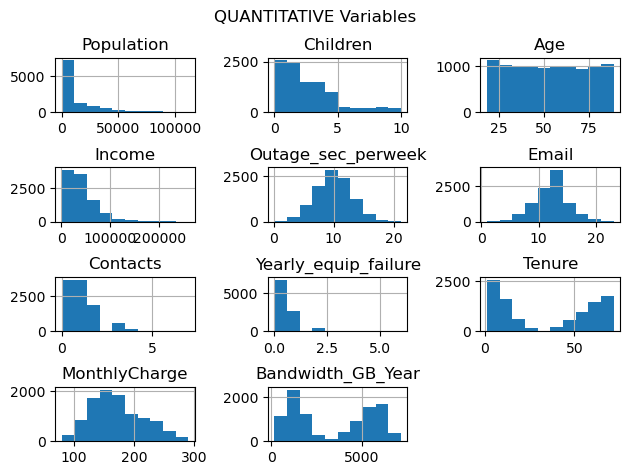

In [26]:
# Creating histograms of each quantitative variable
df_quant.hist()
plt.tight_layout()
plt.suptitle('QUANTITATIVE Variables')
plt.subplots_adjust(top=0.88)
plt.show()

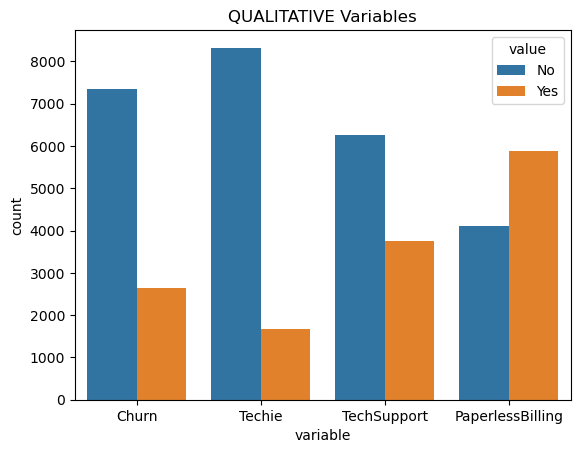

In [27]:
# Creating a seaborn countplot of all the 'Yes'/'No' counts in each variable
countplot = pd.melt(df_qual)
sns.countplot(x='variable', hue='value', data=countplot)
plt.title('QUALITATIVE Variables')
plt.show()

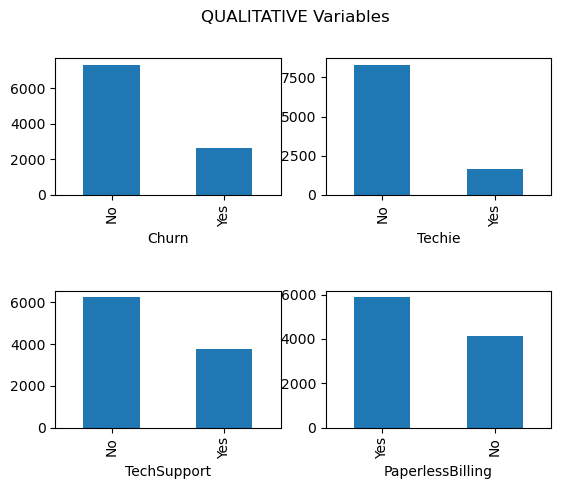

In [28]:
# Same univariate visualization but each variable in separate graphs
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('QUALITATIVE Variables')
df_qual['Churn'].value_counts().plot(ax=ax1, kind='bar')
df_qual['Techie'].value_counts().plot(ax=ax2, kind='bar')
df_qual['TechSupport'].value_counts().plot(ax=ax3, kind='bar')
df_qual['PaperlessBilling'].value_counts().plot(ax=ax4, kind='bar')
fig.subplots_adjust(hspace=0.7)
plt.show()

#### **Bivariate** visualizations for each independent variable with 'Churn' as the dependent variable

In [29]:
# Merge both the QUANTITATIVE and QUALITATIVE data frames together
logreg_df = pd.concat([df_quant, df_qual], axis=1)
print(logreg_df.columns)

Index(['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Churn', 'Techie', 'TechSupport',
       'PaperlessBilling'],
      dtype='object')


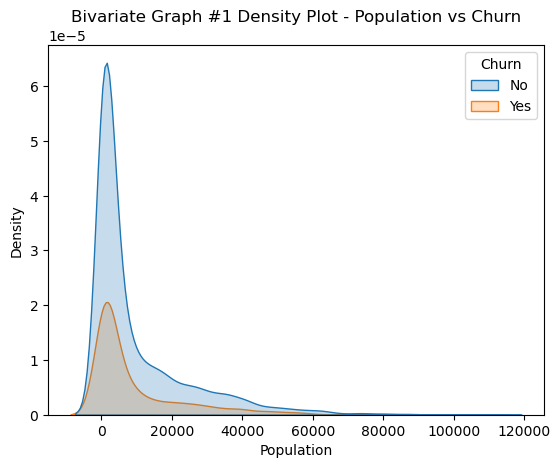

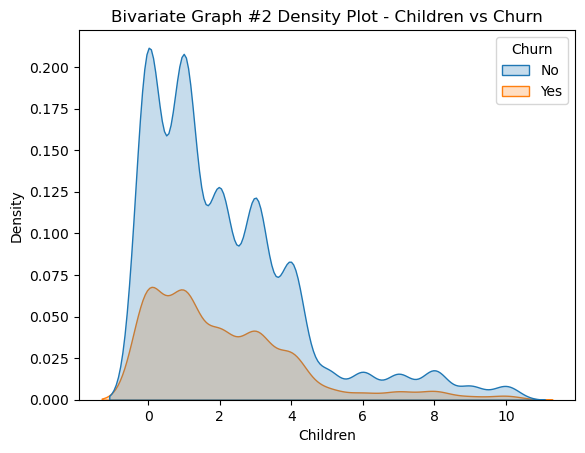

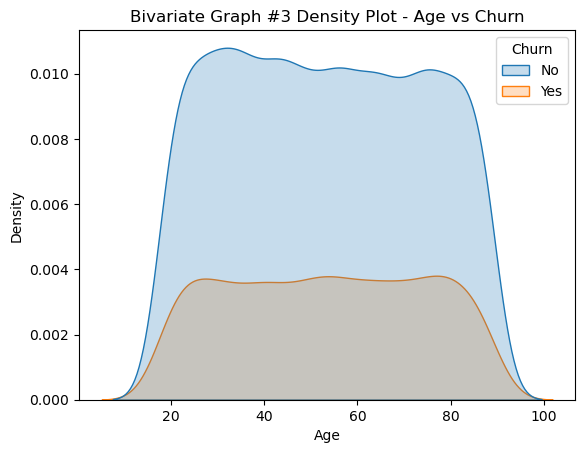

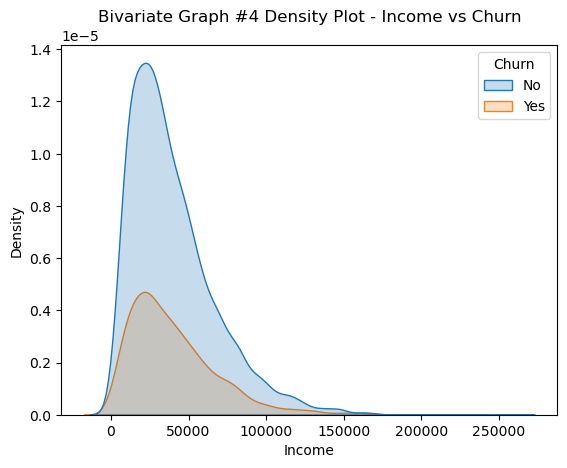

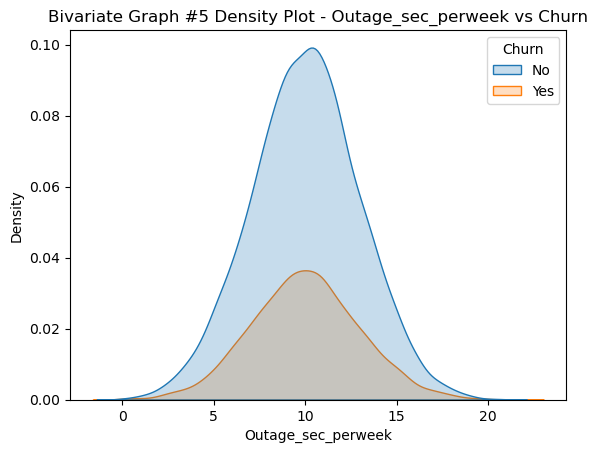

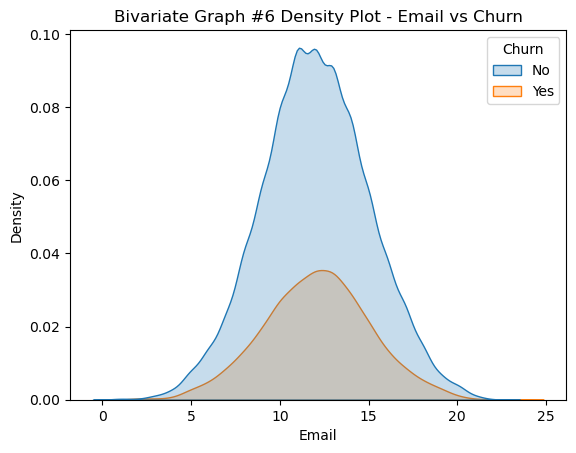

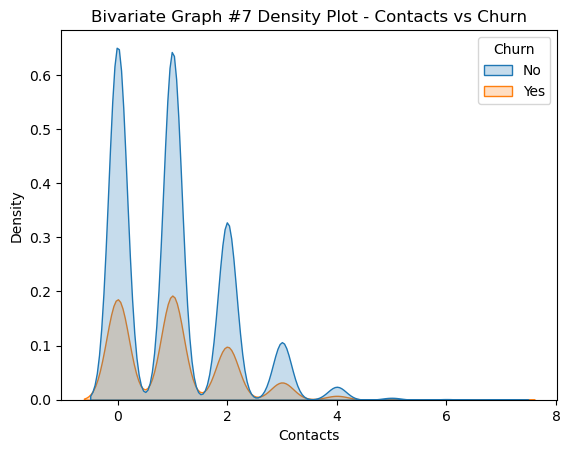

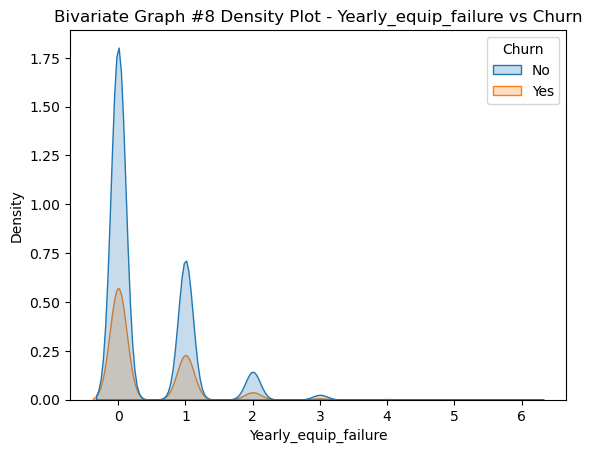

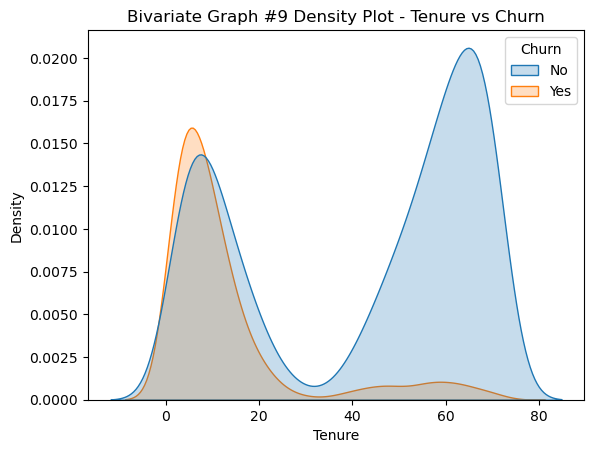

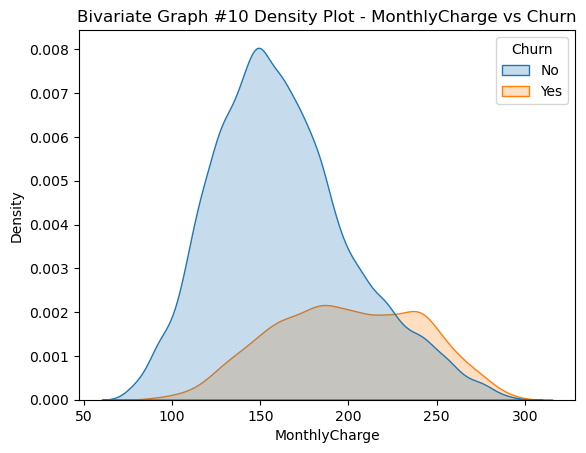

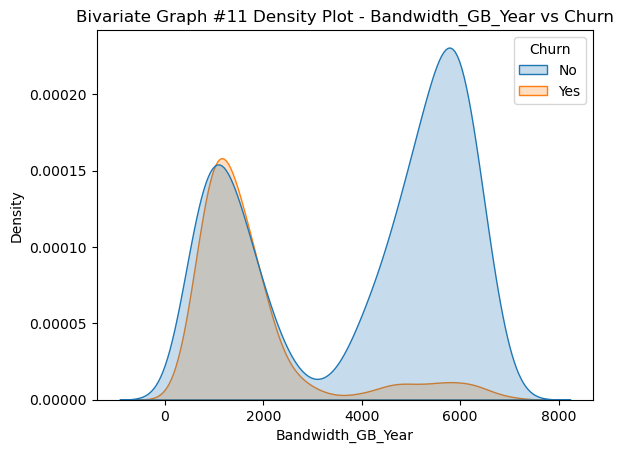

In [30]:
# Writing a FOR loop to iterate the plotting process over 11 independent quantitative variables
for i in range(len(logreg_df.columns)):
    col = {0:'Population', 1:'Children', 2:'Age', 3:'Income', 4:'Outage_sec_perweek',
       5:'Email', 6:'Contacts', 7:'Yearly_equip_failure', 8:'Tenure',
       9:'MonthlyCharge', 10:'Bandwidth_GB_Year', 11:'Churn', 12:'Techie',
       13:'TechSupport', 14:'PaperlessBilling'}
    if i < 11:
        plt.figure()
        sns.kdeplot(x=logreg_df.iloc[:,i], hue='Churn', data=logreg_df, fill=True)
        plt.title("Bivariate Graph #" + str(i+1) + " Density Plot - " +col[i] + " vs Churn")
        plt.show()

<Figure size 640x480 with 0 Axes>

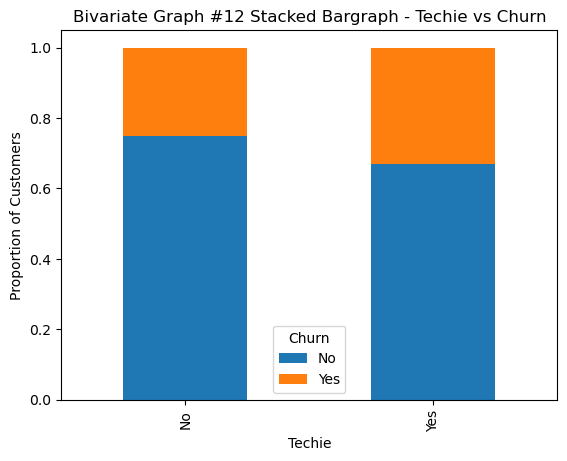

<Figure size 640x480 with 0 Axes>

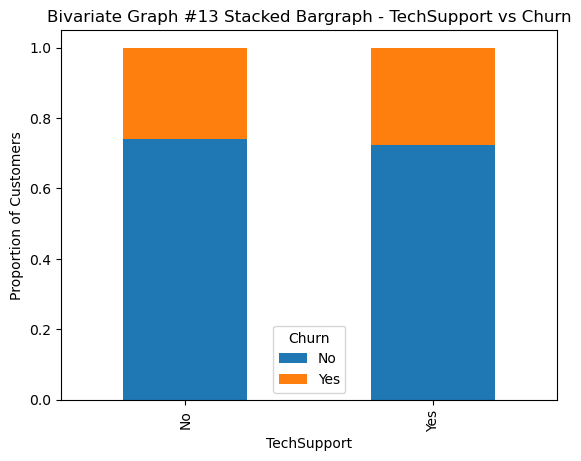

<Figure size 640x480 with 0 Axes>

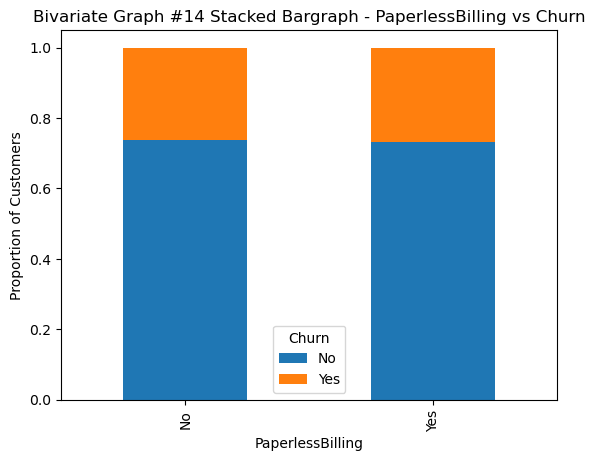

In [31]:
# Writing a FOR loop to iterate the plotting process over 3 independent categorical variables
# Using Dr. Sewell's code for creating crosstab and stacked bar plot
for i in range (12, 15):
    col = {0:'Population', 1:'Children', 2:'Age', 3:'Income', 4:'Outage_sec_perweek',
       5:'Email', 6:'Contacts', 7:'Yearly_equip_failure', 8:'Tenure',
       9:'MonthlyCharge', 10:'Bandwidth_GB_Year', 11:'Churn', 12:'Techie',
       13:'TechSupport', 14:'PaperlessBilling'}
    plt.figure()
    table=pd.crosstab(logreg_df.iloc[:,i], logreg_df.Churn)
    table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
    plt.title("Bivariate Graph #" + str(i) + " Stacked Bargraph - " + col[i] + " vs Churn")
    plt.ylabel('Proportion of Customers')
    plt.show()

### C4 Data Transformation
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; One of the last steps for cleaning data is **data wrangling**, the manipulation of our data so that it is in a workable format.  We had touched on a data wrangling issue earlier when manipulating the zip code data from datatype integer to a string with 5 digits.  To complete data wrangling we will mainly be looking at categorical variables and manipulating them before they are able to be used in modeling.  According to Dr. Middleton (2022) machine learning algorithms work exclusively with numeric data, which means that if your data contains categorical data  they must be re-expressed or encoded as numbers before they can be used.  There are may ways to do this with the tools available to us in Python.  One popular method is the creation of dummy variables through **get_dummies()** from the pandas package, which takes a categorical variable and creates as many dummy variables as there are unique values within this categorical variable while assigning a 0 or 1 to the dummy variables, with 0 indicating that the particular data point **does not** contain the value designated by the dummy variable while 1 indicates that the particular data point **does** contain the value corresponding to the dummy variable.  Dr. Middleton (2022) and Dr. Sewell (n.d.) warn that using this method can add too many dimensions to the data if a variable has high cardinality, such as the variables 'City' or 'State'.  Using the **get_dummies()** on the variable 'State' will likely add 50 dummy variables that will make modeling much more complicated than needed.  Luckily, the data exploration process found that the categorical variables we are working with ('Churn', 'Techie', 'TechSupport', 'PaperlessBilling') are all Boolean in nature, containing only **Yes** and **No** values.  While we can use the **get_dummies()** method of wrangling our data, Dr. Sewell also suggests using **.replace()** or **.map()** to re-express the categorical variables, especially when they are Boolean.  We will be taking our categorical variables and re-expressing a **Yes** value with 1 while a **No** value will be replaced with 0.

In [32]:
# Re-expression of categorical variables: 'Churn', 'Techie', 'TechSupport', 'PaperlessBilling'
# We will be using both .replace() and .map() to show both methods achieve same results
logreg_df['Churn'].replace(['Yes', 'No'], [1, 0], inplace=True)
logreg_df['Techie'].replace(['Yes', 'No'], [1, 0], inplace=True)
logreg_df['TechSupport'] = logreg_df['TechSupport'].map({'Yes':1, 'No':0})
logreg_df['PaperlessBilling'] = logreg_df['PaperlessBilling'].map({'Yes':1, 'No':0})

In [33]:
print(logreg_df[['Churn', 'Techie', 'TechSupport', 'PaperlessBilling']].info())
print(logreg_df[['Churn', 'Techie', 'TechSupport', 'PaperlessBilling']].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Churn             10000 non-null  int64
 1   Techie            10000 non-null  int64
 2   TechSupport       10000 non-null  int64
 3   PaperlessBilling  10000 non-null  int64
dtypes: int64(4)
memory usage: 312.6 KB
None
   Churn  Techie  TechSupport  PaperlessBilling
0      0       0            0                 1
1      1       1            0                 1
2      0       1            0                 1
3      0       1            0                 1
4      1       0            1                 0


In [34]:
# One last check on our cleaned dataframe containing all our model variables
print(logreg_df.info())
print(logreg_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            10000 non-null  int64  
 1   Children              10000 non-null  int64  
 2   Age                   10000 non-null  int64  
 3   Income                10000 non-null  float64
 4   Outage_sec_perweek    10000 non-null  float64
 5   Email                 10000 non-null  int64  
 6   Contacts              10000 non-null  int64  
 7   Yearly_equip_failure  10000 non-null  int64  
 8   Tenure                10000 non-null  float64
 9   MonthlyCharge         10000 non-null  float64
 10  Bandwidth_GB_Year     10000 non-null  float64
 11  Churn                 10000 non-null  int64  
 12  Techie                10000 non-null  int64  
 13  TechSupport           10000 non-null  int64  
 14  PaperlessBilling      10000 non-null  int64  
dtypes: float64(5), int64

### C5 Prepared Dataset
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Our working data set has been cleaned and manipulated into a format that we can use in our regression model.  At this point we will be exporting the data into a **.csv** file to preserve the changes we have done to the data.  Because the instruction on the performance assessment were not clear on whether a **.csv** file was needed on the entire data set or only the variables we are working with, both sets of data will be exported and submitted.  We will be exporting **clean_df** containing the entire cleaned data set into the file **D208_Entire_clean_df_Edward_Wu.csv**.  Likewise, the cleaned data set **logreg_df** containing the cleaned and wrangled data for the variables we will be working with in our model will be exported into **D208_LogReg_variables_df_Edward_Wu.csv**.

In [35]:
clean_df.to_csv('D208_Entire_clean_df_Edward_Wu.csv', index=False)
logreg_df.to_csv('D208_LogReg_variables_df_Edward_Wu.csv', index=False)

## Part 4 Model Comparison and Analysis
### D1 Initial Model
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; For the initial model we will be using all the features identified previously in part C2, which we have saved under **logreg_df**.  The idea of this initial model is not create the perfect model but rather to throw everything against the wall and see what sticks.

In [36]:
mdl = logit("Churn ~ Population + Children + Age + Income + Outage_sec_perweek + \
          Email + Contacts + Yearly_equip_failure + Tenure + MonthlyCharge + \
          Bandwidth_GB_Year + Techie + TechSupport + PaperlessBilling",
          data=logreg_df).fit()

Optimization terminated successfully.
         Current function value: 0.316125
         Iterations 8


In [37]:
print(mdl.summary())

                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9985
Method:                           MLE   Df Model:                           14
Date:                Fri, 26 Apr 2024   Pseudo R-squ.:                  0.4533
Time:                        00:53:49   Log-Likelihood:                -3161.2
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -6.1734      0.263    -23.460      0.000      -6.689      -5.658
Population           -2.195e-06   2.21e-06     -0.993      0.321   -6.53e-06    2.14e-06
Children    

### D2 Justification of Model Reduction
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; From the above summary we can see that there are some very high p-values which indicate that there a few variables that are not significant for our model.  According to Dr. Middleton (2022) we first use must check for and remove multicollinearity before we start the model reduction process.  She suggests using VIF, short for variance inflation factor, to check for multi-collinearity since one of the assumptions of linear regression is that the independent variables are not too highly correlated with each other.  Dr. Sewell (n.d.) provided the code for VIF and recommends the removal of any variables with a VIF score of 10 or above since a VIF score of 10 represents multicollinearity within our independent variables.  Afterwards Dr. Middleton suggests using the wrapper method of **Backward Stepwise Elimination** for feature selection, which is an iterative process of model reduction after starting with all features and removing the least significant feature based on p-value at each iteration.  Because we are looking at an alpha of 5% we will be removing features with the highest p-values over 0.05 and repeating the model fit iteratively until improvement is no longer observed.  

### D3 Reduced Linear Regression Model
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The following lines of codes will execute the iterative steps listed above and the outputs for either the VIF or p-values will be listed at each step of the feature selection along with a final **.summary()** at the end of feature selection to provide a **reduced model** that will be saved under the new variable **reduce_mdl**.

In [38]:
# Using Dr. Sewell's (n.d.) code for VIF calculations
X = logreg_df[['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Techie', 'TechSupport', 'PaperlessBilling']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]
print(vif_data)

                 feature         VIF
0             Population    1.449552
1               Children    2.085845
2                    Age    7.350639
3                 Income    2.881804
4     Outage_sec_perweek   10.041705
5                  Email   12.263888
6               Contacts    1.986448
7   Yearly_equip_failure    1.383351
8                 Tenure  247.092438
9          MonthlyCharge   20.335060
10     Bandwidth_GB_Year  312.200698
11                Techie    1.196940
12           TechSupport    1.629166
13      PaperlessBilling    2.363970


In [39]:
# Removal of multicollinearity Step 1
# Removing VIF score over 10
    # Bandwidth_GB_Year with VERY HIGH VIF 312.20
X = logreg_df[['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Techie', 'TechSupport', 'PaperlessBilling']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]
print(vif_data)

                 feature        VIF
0             Population   1.449425
1               Children   1.911096
2                    Age   6.765437
3                 Income   2.879820
4     Outage_sec_perweek  10.035023
5                  Email  12.248088
6               Contacts   1.985669
7   Yearly_equip_failure   1.383263
8                 Tenure   2.626316
9          MonthlyCharge  12.956461
10                Techie   1.196910
11           TechSupport   1.624515
12      PaperlessBilling   2.363784


In [40]:
## Tenure VIF dropped from 247.09 to 2.63 after Bandwidth_GB_Year was removed, we can conclude they were highly correlated
# Removal of multicollinearity Step 2
# Removing VIF score over 10
    # MonthlyCharge with VIF 12.96
X = logreg_df[['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure',
       'Techie', 'TechSupport', 'PaperlessBilling']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]
print(vif_data)

                 feature        VIF
0             Population   1.446991
1               Children   1.901375
2                    Age   6.449544
3                 Income   2.843088
4     Outage_sec_perweek   9.079822
5                  Email  10.686201
6               Contacts   1.974102
7   Yearly_equip_failure   1.380959
8                 Tenure   2.600496
9                 Techie   1.194112
10           TechSupport   1.585015
11      PaperlessBilling   2.339871


In [41]:
# Removal of multicollinearity Step 3
# Removing VIF score over 10
    # Email with VIF 10.69
X = logreg_df[['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Contacts', 'Yearly_equip_failure', 'Tenure',
       'Techie', 'TechSupport', 'PaperlessBilling']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]
print(vif_data)

                 feature       VIF
0             Population  1.435459
1               Children  1.871520
2                    Age  5.788206
3                 Income  2.767747
4     Outage_sec_perweek  7.186744
5               Contacts  1.949447
6   Yearly_equip_failure  1.377417
7                 Tenure  2.553207
8                 Techie  1.191554
9            TechSupport  1.566851
10      PaperlessBilling  2.298688


In [42]:
# No more multicollinearity after removal of high VIF variables:
    # Bandwidth_GB_Year, MonthlyCharge, Email
# Refitting the model by removing these variables
reduce_mdl = logit("Churn ~ Population + Children + Age + Income + Outage_sec_perweek + \
          Contacts + Yearly_equip_failure + Tenure + \
          Techie + TechSupport + PaperlessBilling",
          data=logreg_df).fit()
# We can take a look at p-values from this reduced model to begin feature selection
print(reduce_mdl.pvalues.round(5))

Optimization terminated successfully.
         Current function value: 0.441112
         Iterations 7
Intercept               0.43159
Population              0.26710
Children                0.59711
Age                     0.09557
Income                  0.40637
Outage_sec_perweek      0.76196
Contacts                0.26731
Yearly_equip_failure    0.25482
Tenure                  0.00000
Techie                  0.00000
TechSupport             0.04835
PaperlessBilling        0.37681
dtype: float64


In [43]:
# Backward Stepwise Elimination Step #1
# Reducing model by removing highest p-value over 0.05 
    # Outage_sec_perweek with p-value 0.76
reduce_mdl = logit("Churn ~ Population + Children + Age + Income + \
          Contacts + Yearly_equip_failure + Tenure + \
          Techie + TechSupport + PaperlessBilling",
          data=logreg_df).fit()
print(reduce_mdl.pvalues.round(5))

Optimization terminated successfully.
         Current function value: 0.441116
         Iterations 7
Intercept               0.19148
Population              0.26839
Children                0.59886
Age                     0.09647
Income                  0.40926
Contacts                0.26510
Yearly_equip_failure    0.25637
Tenure                  0.00000
Techie                  0.00000
TechSupport             0.04862
PaperlessBilling        0.37796
dtype: float64


In [44]:
# Backward Stepwise Elimination Step #2
# Reducing model by removing highest p-value over 0.05 
    # Children with p-value 0.60
reduce_mdl = logit("Churn ~ Population + Age + Income + \
          Contacts + Yearly_equip_failure + Tenure + \
          Techie + TechSupport + PaperlessBilling",
          data=logreg_df).fit()
print(reduce_mdl.pvalues.round(5))

Optimization terminated successfully.
         Current function value: 0.441130
         Iterations 7
Intercept               0.22587
Population              0.27018
Age                     0.09425
Income                  0.41594
Contacts                0.26053
Yearly_equip_failure    0.25505
Tenure                  0.00000
Techie                  0.00000
TechSupport             0.04872
PaperlessBilling        0.38177
dtype: float64


In [45]:
# Backward Stepwise Elimination Step #3
# Reducing model by removing highest p-value over 0.05 
    # Income with p-value 0.42
reduce_mdl = logit("Churn ~ Population + Age + \
          Contacts + Yearly_equip_failure + Tenure + \
          Techie + TechSupport + PaperlessBilling",
          data=logreg_df).fit()
print(reduce_mdl.pvalues.round(5))

Optimization terminated successfully.
         Current function value: 0.441163
         Iterations 7
Intercept               0.09932
Population              0.26655
Age                     0.09597
Contacts                0.26038
Yearly_equip_failure    0.25547
Tenure                  0.00000
Techie                  0.00000
TechSupport             0.04830
PaperlessBilling        0.38409
dtype: float64


In [46]:
# Backward Stepwise Elimination Step #4
# Reducing model by removing highest p-value over 0.05 
    # PaperlessBilling with p-value 0.38
reduce_mdl = logit("Churn ~ Population + Age + \
          Contacts + Yearly_equip_failure + Tenure + \
          Techie + TechSupport",
          data=logreg_df).fit()
print(reduce_mdl.pvalues.round(5))

Optimization terminated successfully.
         Current function value: 0.441201
         Iterations 7
Intercept               0.03786
Population              0.26849
Age                     0.09524
Contacts                0.26649
Yearly_equip_failure    0.25969
Tenure                  0.00000
Techie                  0.00000
TechSupport             0.05023
dtype: float64


In [47]:
# Backward Stepwise Elimination Step #5
# Reducing model by removing highest p-value over 0.05 
    # Population with p-value 0.27
reduce_mdl = logit("Churn ~ Age + \
          Contacts + Yearly_equip_failure + Tenure + \
          Techie + TechSupport",
          data=logreg_df).fit()
print(reduce_mdl.pvalues.round(5))

Optimization terminated successfully.
         Current function value: 0.441262
         Iterations 7
Intercept               0.05821
Age                     0.10023
Contacts                0.26842
Yearly_equip_failure    0.26100
Tenure                  0.00000
Techie                  0.00000
TechSupport             0.04763
dtype: float64


In [48]:
# Backward Stepwise Elimination Step #6
# Reducing model by removing highest p-value over 0.05 
    # Contacts with p-value 0.27
reduce_mdl = logit("Churn ~ Age + \
          Yearly_equip_failure + Tenure + \
          Techie + TechSupport",
          data=logreg_df).fit()
print(reduce_mdl.pvalues.round(5))

Optimization terminated successfully.
         Current function value: 0.441324
         Iterations 7
Intercept               0.01967
Age                     0.09554
Yearly_equip_failure    0.26156
Tenure                  0.00000
Techie                  0.00000
TechSupport             0.04937
dtype: float64


In [49]:
# Backward Stepwise Elimination Step #7
# Reducing model by removing highest p-value over 0.05 
    # Yearly_equip_failure with p-value 0.26
reduce_mdl = logit("Churn ~ Age + \
          Tenure + \
          Techie + TechSupport",
          data=logreg_df).fit()
print(reduce_mdl.pvalues.round(5))

Optimization terminated successfully.
         Current function value: 0.441387
         Iterations 7
Intercept      0.03094
Age            0.09746
Tenure         0.00000
Techie         0.00000
TechSupport    0.05213
dtype: float64


In [50]:
# Backward Stepwise Elimination Step #8
# Reducing model by removing highest p-value over 0.05 
    # Age with p-value 0.10
reduce_mdl = logit("Churn ~ \
          Tenure + \
          Techie + TechSupport",
          data=logreg_df).fit()
print(reduce_mdl.pvalues.round(5))

Optimization terminated successfully.
         Current function value: 0.441524
         Iterations 7
Intercept      0.00000
Tenure         0.00000
Techie         0.00000
TechSupport    0.04799
dtype: float64


In [51]:
print(reduce_mdl.summary())

                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Fri, 26 Apr 2024   Pseudo R-squ.:                  0.2364
Time:                        00:57:45   Log-Likelihood:                -4415.2
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2790      0.042      6.644      0.000       0.197       0.361
Tenure         -0.0556      0.001    -40.847      0.000      -0.058      -0.053
Techie          0.4562      0.068      6.680    

### E1 Model Comparison
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Now that we have our reduced model, we need some type of evaluation metric to assess our model.  We can see from the summary printout above that there are a few metrics provided for us but we will only be discussing the following: **Log-Likelihood**, **Pseudo R-squared**, and **LLR p-value**.  Dr. Middleton (2022) explains that **Log Likehood** is a way to measure goodness of fit for a model with higher values being indicating a better model fit of the dataset, but she also explains that this is only useful to compare two regression models with the same number of predictor variables.  The downfall of Log-Likelihood is that adding more predictor variables to a model will always increase the log-likehood value, regardless of if the additional predictor variables are statistically significant or not.  Dr. Middleton states that the next output of **Pseudo R-squared** is not the same as the R-squared used in linear regression models where R-squared is used to explain the percentage of variation, but rather only to compare models to show that a model with higher numbers (on a scale of 0 to 1) is a better model than one with lower numbers.  This brings us to **LLR p-value** which Dr. Middleton suggests is the better model evaluation metric, in that it is similar to the F-statistics that provides a p-value for the overall linear regression model, where having a p-value below our alpha of 0.05 shows that our model is useful at predicting the values of the response variable compared to a model with no predictor variables.  The output for all 3 of these model evaluation metrics will be provided.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; One last model evaluation tool we will be using is the confusion matrix, which we can access from statsmodels using **.pred_table()**.  It returns to us an array containing 4 values in the following order: True negative, false positive, false negative, and true positive.  We can extract these values and reprint them in a more readable format, along with producing a mosaic plot in which the width and height of the columns are proportional the fraction of observations in each category.  Lastly, some calculations are done to provide the **Accuracy**, **Sensitivity**, and **Specificity** of our predictions.  For the purposes of this performance assessment, we are most interested in the **Accuracy** score which is calculated by taking the sum of correct predictions, **true positives** and **true negatives**, dividied by the total predictions.

### E2 Output and Calculations


In [52]:
print('Initial model Log-Likelihood : ', mdl.llf)
print('Initial model McFadden\'s pseudo-R-Squared : ', mdl.prsquared)
print('Initial model LLR p-value : ', mdl.llr_pvalue)

Initial model Log-Likelihood :  -3161.2484772664584
Initial model McFadden's pseudo-R-Squared :  0.45328123816015964
Initial model LLR p-value :  0.0


In [53]:
print('Reduced model Log-Likelihood : ', reduce_mdl.llf)
print('Reduced model McFadden\'s pseudo-R-Squared: ', reduce_mdl.prsquared)
print('Reduced model LLR p-value : ', reduce_mdl.llr_pvalue)

Reduced model Log-Likelihood :  -4415.242437758395
Reduced model McFadden's pseudo-R-Squared:  0.23641058393445513
Reduced model LLR p-value :  0.0


In [54]:
conf_matrix = reduce_mdl.pred_table()
print(conf_matrix)
    # calling the pred_table on the fitted model object will return an array as follows:
    #     TRUE negative     FALSE positive
    #     FALSE negative    TRUE positive
# These values can be extracted from the confusion matrix
# True positives (TP), true negatives (TN), false positives (FP), and false negatives (FN)
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]
# We can reprint the confusion matrix in a more readable format
print('Number of True Negatives : ', TN)
print('Number of False Positives : ', FP)
print('Number of False Negatives : ', FN)
print('Number of True Positives : ', TP)

[[6389.  961.]
 [1465. 1185.]]
Number of True Negatives :  6389.0
Number of False Positives :  961.0
Number of False Negatives :  1465.0
Number of True Positives :  1185.0


<Figure size 640x480 with 0 Axes>

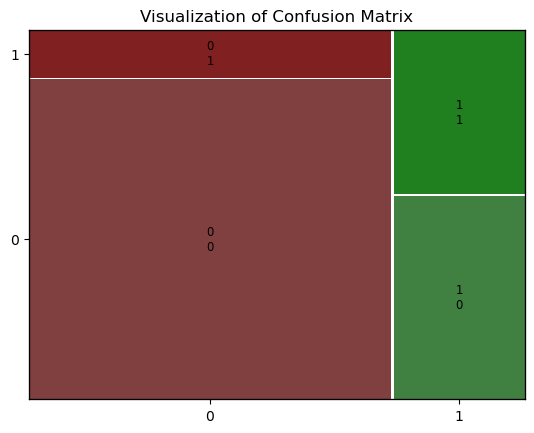

In [55]:
# Mosaic function from statsmodels lets you easily plot the confusion matrix
    # The width and height of each column is proportional to the fraction of observations in each category of actual values
plt.figure()
mosaic(conf_matrix)
plt.title('Visualization of Confusion Matrix')
plt.show()

In [57]:
## Ways of quantifying model fit using performance metrics
# We can fit the extracted confusion matrix values into the following formulas
# Accuracy is the proprotion of correct predictions, higher is better
accuracy =  (TN + TP) / (TN + FN + TP + FP)
# Sensitivity is the proportion of true positives, higher is better
sensitivity = TP / (FN + TP)
# Specificity is the proportion of true negatives, higher is better but usually comes as the cost of sensitivity (so not as good)
specificity = TN / (TN + FP)
print("Model Accuracy is : ", accuracy.round(4))
print("Model Sensitivity is : ", sensitivity.round(4))
print("Model Specificity is : ", specificity.round(4))

Model Accuracy is :  0.7574
Model Sensitivity is :  0.4472
Model Specificity is :  0.8693


### E3 Code
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; This entire performance assessment was created solely using Python with written portions of the assessment produced using **Markdown**.  A copy of this Python Notebook will be submitted named **D208 Task2 Edward.ipynb**.

## Part 5 Data Summary and Implications
### F1 Results
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; We will be constructing a logistic regression equation for our reduced model.  At its core the equation of a straight line is as follows:

$y = mx + b$

In this equation **'y'** is the dependent variable, **'m'** is the slope or coefficient, **'x'** is the independent variable, and **'b'** is the intercept where the line meets the y-axis when all coefficients are equal to 0.  In multiple linear regression we stretch the equation out to include all coefficients and independent variables as follows, up to **'n'** number of variables.

$\hat{y} = m_{1}x_{1} + m_{2}x_{2} + \cdots + m_{n}x_{n} + b$

Recall that logistic regression returns to us a probability and is based on our linear regression equation but transformed by wrapping with a logit function.

$P = \frac{1}{1 + e^-(mx + b)}$

$\ln{(\frac{P}{1 - P})} = mx + b$

We can then substitute in our coefficients by either look at the **.summary()** from statsmodels or we can also print **.params** which pulls the coefficients for us.

In [58]:
print(reduce_mdl.params)

Intercept      0.278968
Tenure        -0.055612
Techie         0.456208
TechSupport    0.106491
dtype: float64


From these coefficients we can now construct the logistic regression equation for our reduced model.  It is as follows:

$\ln{(\frac{P}{1 - P})} = 0.2790 - 0.0556(Tenure) + 0.4562(Techie) + 0.1065(TechSupport)$

Dr. Middleton explains that in regression, the coefficients for each independent variable gives you the size of the effect that variable is having on your dependent variable and the positive or negative sign on the coefficient gives you the direction of the effect.  With logistic regression, the coefficient interpretations are slightly different than with linear regression since the end result is a probability.  Professor Mike Marin of The University of British Columbia (2021) states the coefficients are log-odds of achieving 1 for our probability.  He explains that intercept is the constant or the base log-odds when all other coefficients are equal to 0.  He further explains that coefficients for binary categorical variables, **Techie** and **TechSupport** in our case, are the change in log-odds for our variable relative to whether the value was defined as 1 (for "Yes") or 0 (for "No").  Lastly, the coefficient for continuous variables, in our case **Tenure**, shows the change in log-odds for each unit change in this variable.  Dr. Middleton also suggests providing the odds ratio to make the findings more easily palatable since log odds not easily interpretable and conceptualized by everyone.  To find the **odds ratio**, we perform the raise **Euler's constant**, the mathematical constant **e**, to the power of our coefficient.  We can do this in python using numpy's **.exp()** function.

In [60]:
# Odds ratio calculations
print('The odds ratio of Intercept is : ', np.exp(reduce_mdl.params[0]))
print('The odds ratio of Tenure is : ', np.exp(reduce_mdl.params[1]))
print('Percent change of Tenure is : ', (np.exp(reduce_mdl.params[1]) - 1)*100, '%')
print('The odds ratio of Techie is : ', np.exp(reduce_mdl.params[2]))
print('Percent change of Techie is : ', (np.exp(reduce_mdl.params[2]) - 1)*100, '%')
print('The odds ratio of TechSupport is : ', np.exp(reduce_mdl.params[3]))
print('Percent change of TechSupport is : ', (np.exp(reduce_mdl.params[3]) - 1)*100, '%')

The odds ratio of Intercept is :  1.32176477183422
The odds ratio of Tenure is :  0.9459059006269475
Percent change of Tenure is :  -5.409409937305254 %
The odds ratio of Techie is :  1.5780785897026013
Percent change of Techie is :  57.80785897026013 %
The odds ratio of TechSupport is :  1.1123675040748995
Percent change of TechSupport is :  11.236750407489948 %


From the model coefficients and the odds ratio calculations, we can then conclude the following:

>**Intercept** of 0.2790 is the constant log odds when all of the explanatory variables are equal to zero.

>coefficient of -0.0556 for quantitative variable **Tenure** means that for each unit month of tenure the customer has, we expect the log-odds to decrease by 0.0556.  The odds ratio returned 0.9459, which indicates a **decrease** in odds ratio by 5.41% per month of tenure the customer has.

>coefficient of +0.4562 for categorical variable **Techie** means that if the customer answered "Yes" to being technically inclined, we expect the log-odds to increase by 0.4562.  The odds ratio returned 1.5781, which indicates that the odds of a customer churning are 1.5681 times higher if they identify as being technically inclined, which is a 57.81% **increase** in odds.

>coefficient of +0.0117 for categorical variable **TechSupport** means that if the customer has a technical support add-on, we expect the log-odds to increase by 0.0117.  The odds ratio returned 1.1124, which indicates that the odds of a customer churning are 1.1124 times higher if they have a technical support add-on, which is a 11.24% **increase** in odds

In [61]:
# We run one last .summary() on reduced model for easier access for discussion
print(reduce_mdl.summary())

                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Fri, 26 Apr 2024   Pseudo R-squ.:                  0.2364
Time:                        01:05:53   Log-Likelihood:                -4415.2
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2790      0.042      6.644      0.000       0.197       0.361
Tenure         -0.0556      0.001    -40.847      0.000      -0.058      -0.053
Techie          0.4562      0.068      6.680    

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; One way to quantify how useful a model is by measuring statistical significance.  Dr. Middleton (2022) states that statistical significance helps to determine whether a result is likely due to chance, when a finding is significant it means there is much confidence are results are not based on chance or luck.  From the results of our analysis, we can conclude that our model has **very high statistical significance**.  Mentioned earlier, we will be using **LLR p-value** as the model evaluation metric.  Dr. Middleton explains that LLR p-value is similar to the F-statistics that provides a p-value for the overall linear regression model, where a value closer to 0 indicates statistical signifiance and having a p-value below our alpha of 0.05 shows that our model is useful at predicting the values of the response variable compared to a model with no predictor variables .  In statistics the standard alpha level of 0.05 is chosen as this signifies a 5% probability that the results can occur due to chance while we can be 95% confident that our results are not random.  Both the initial model and reduced model have LLR p-values of **0.000**, which indicates that the p-values for both models are very close to 0, that both models have **very high statistical significance**, and that we can have utmost confidence in our regression model.  One of the central tenets of regression analysis is to use the model with the best model metric while using the least number of variables.  We started our initial model with using 14 independent variables and was able to reduce the number of variables down to 3 in the final model.  Because both models have LLR p-values very close to 0, we can safely say that the **reduced model is the better model** because we can have the predictive powers of our regression model without having to worry about overfitting to our dataset.  We can also see our model **Accuracy** score of **75.74%**, which is the percentage of correct predictions to total predictions, indicating a good model.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; While we can understand the statistical significance of our model, having a practical use of it with a real world application is what companies are paying us ***BIG BUCKS*** for.  Dr. Middleton states that to assess for practical significance which refers to when the results are meaningful and useful in the real world.  We noted above that LLR p-value of **0.000** shows that we can have strong confidence in our results, but the practicality of some of these variables may be questionable.  Of the current independent variables from our reduced model, the categorical variable **Techie** seems to exert the most influence over churn rate, with a simple "Yes" answer to this survey increasing the odds of churn by 57.81%.  Surveyed data is inherently biased because it is based on a customer response and can be colored by what ever biases and perceptions the customer has.  Meanwhile the other categorical variable **TechSupport** shows a customer with technical support add-on has an increased the odds of churn by 11.24%.  One could argue that someone who is less technologically inclined would be more likely to sign up for the technical support add-on.  If we follow this assumption to its logical conclusion, then we come upon a conundrum, since a person who is less technically inclined and wants technical support has increased odds of churn, while a person who is a **Techie** and is technologically inclined will also be more likely to churn.  This in turn creates a bit of a paradoxical situation in terms of our model and analysis.  A more practical regression may have a more general model that casts a wider net for customers regardless of these two variables.  The last independent variable we used was **Tenure**, which shows a decrease in odds by 5.41% for each month of tenure a customer has with the company, indicating that newer customers are much more likely to churn than longer tenured customers.  Despite some practicality issues, we were still able to answer our research question, "Which factors affect if a customer will churn within this company", and thus we can conclude that our regression has both **strong statistical significance** and **some practical significance** as the findings of our assessment can be used to develop real world applications which will be discussed in the recommendations section below.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  This analysis provides a strong case for usage of the regression model, but there are also a few **limitations** regarding our analysis.  We will first review and verify the assumptions of linear and logistic regression mentioned earlier:

1. The assumption for a linear relationship between dependent variable and independent variables is met.  As seen by our measurements for model performance we obtained a LLR p-value of 0.000, there is a close to 0.00% probability of our model happening due to random chance, proving our linear relationship.
2. Our assumption of not having multicollinearity is also met as we have used VIF to remove all independent variables that were at risk of being too highly correlated with each other.
3. The assumption of independent observations was also met as we had already checked for duplicates during the data cleaning process, so we know that each row of this data set is an independent observation. 
4. The assumption for logistic regression that the dependent variable is binary, since it's range of values is only **Yes** and **No**.  This also fulfills the assumption that the predicted values are restricted to a nomimal range since only **Yes** and **No** values are being predicted.
5. The assumptions for prediction of probabilities is met as seen in the regression equation above, the logistic function by definition is the logit of the odds ratios and are the logarithm of the odds achieving 1.

One of the **limitations** of our analysis is that for normality, **regression is not resistant to outliers**.  We mentioned earlier during the data cleaning process that many outliers were identified but a decision was made to keep all the outliers to preserve the integrity of our data.  While the data does show a more "full picture" of the entire population, the statistical inferences and distribution may become skewed due to the fact that these outliers exist.  Another limitation related to using the regression model was mentioned earlier regarding model evaluation, where **Log-Likelihood** values tend to increase with more variables and using too many variables in **regression models run the risk of overfitting** for our particular data set, meaning the model may not work with another set of data.  One limitation in our analysis is due to the way the model was constructed, we did not cast a wide enough net in our initial variable selection process.  One area of interest in statistics is finding hidden interactions between variables and since our initial variable selection process left out a lot of variables, we run the risk of missing these potentially hidden interactions within our regression model.  Another limitation of this analysis is rooted in the data itself, since it contains surveyed data there may be bias in the data itself.  Data that is self-reported such as the **Techie** variable we used or any of the other survey data included in this data set run the risk of having bias due to self-report since customers are providing their own subjective input.  One last limitation of our analysis is a fundamental pitfall of statistics, the often repeated mantra of statistics is that correlation is not causation, our findings may have found correlation but we can not say definitively that these variables are the reason why a change occurs in our dependent variable.


### F2 Recommendations
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; We have established that our analysis contains both **statistical significance** and **practical significance** for answering our research question, allowing us to infer customer behavior going forward and provide recommendations for the business.  As mentioned above, we can glean which variables are correlated with **Churn**.  From this information, we can make a few general statements.  Customers who have tenured with the company longer tend to not churn as easily.  **Techie** has the highest effect on churn and customers who considers themselves as being technologically fluent tend to churn much more easily.  Customers with **TechSupport** add-on also have higher odds of churning.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; In this type of scenario, we can recommend the company create some type of incentives packages for longer tenured customers  since they tend to not churn so easily.  We can also recommend a loyalty rewards program based on how long they've been with the company to keep longer tenured customers happy and incentivize people who were thinking of leaving to stay so that they become one of the loyal long term customers.  It is also possible to have special packages designed for people who believe they are technologically savvy in anticipation of the higher odds of churn for this segment of the market.  These recommendations are aimed at increasing the length of tenure of the customer thereby reducing churn.

## Part 6 Demonstration
### G1 Panopto Demonstration
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; To satisfy the requirements for this task, a Panopto video was recorded to demonstrate my competency with the coursework.  The Panopto video will include the following elements as part of the requirements:

>an identification of the version of the programming environment

>a comparison of the initial multiple linear regression model and the reduced linear regression model

>an interpretation of the coefficients of the reduced model

This Panopto video URL is provided below:

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=34456c25-ed59-4f90-aa75-b15e004caf05

## Part 8 Web Sources
### H1 Sources of Third-Party Code
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; For this assessment the data set used was provided on the WGU D208 performance assessment webpage.  The code written for this assignment was developed by using my own knowledge and experience with Python from previous Coursera courses I have taken along with instructions from the D208 coursework including the WGU website, Dr. Keiona Middleton and Dr. William Sewell’s Panopto webinar videos, and the DataCamp (datacamp.com) website.  Cited below is also the statsmodels, matplotlib, and seaborn websites which are manuals for the Python packages and were used to fine tune certain methods with parameters within the code.  A Github page from Dr. Randall Prium of Calvin University was used to assist in formating mathematical equations in Markdown.  Lastly a few lines from StackOverflow were implemented to help with the data cleaning and visualization process.  Otherwise, no other third-party code was used to support this application.

<div style="page-break-after: always;"></div>

## Part 9 References
### I1 Sources
*Python - loading zip codes into a dataframe as strings?*. Stack Overflow. (2015). https://stackoverflow.com/questions/33137686/python-loading-zip-codes-into-a-dataframe-as-strings 

Seabold, S., & Perktold, J. (n.d.). *statsmodels.discrete.discrete_model.LogitResults - statsmodels 0.15.0 (+270)*. "statsmodels: Econometric and statistical modeling with python". https://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.LogitResults.html 

*Creating multiple subplots using plt.subplots#*. Matplotlib 3.8.4 documentation. (n.d.). https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html 

Waskom, M. L. (n.d.). *Visualizing distributions of data#*. Visualizing distributions of data - seaborn 0.13.2 documentation. https://seaborn.pydata.org/tutorial/distributions.html 

*Countplot from several columns*. Stack Overflow. (n.d.). https://stackoverflow.com/questions/51211538/countplot-from-several-columns

*Use a loop to plot N charts python*. Stack Overflow. (n.d.-b). https://stackoverflow.com/questions/19189488/use-a-loop-to-plot-n-charts-python 

Pruim, R. (2016, October 19). *Mathematics in R Markdown*. Github. https://rpruim.github.io/s341/S19/from-class/MathinRmd.html 

Middleton, K. (2022a). D208 - Webinar: Getting Started with D208 Part I (November 2022). Panopto. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=15e09c73-c5aa-439d-852f-af47001b8970 

Middleton, K. (2022b). D208 - Webinar: Getting Started with D208 Part II (November). Panopto. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=39bbe2db-de7d-4bf5-913b-af5c0003da9d 

Sewell, W. (n.d.-a). *D208 Predictive Modeling Episode 1*. Panopto. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=567da34c-96e3-44c7-a160-ae3100f9433d 

Sewell, W. (n.d.-b).  *D208 Predictive Modeling Episode 2*. Panopto. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=b7ead95b-c392-4973-aa9c-ad1901031ab1 

Sewell, W. (n.d.-c). *D208 Episode 3 rev. 2*. Panopto. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=74faea88-e9ff-4c26-8b9a-ae7f01617cd2 

Sewell, W. (n.d.-d). *D208 Predictive Modeling Episode 4*. Panopto. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=5328e088-48c2-42d7-a5e3-ad27015d138f 

Sewell, W. (n.d.-e). *D208 Pred Modeling Episode 5*. Panopto. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=15852089-76a2-4828-8a42-ad3100e8460c 

Sewell, W. (n.d.-f). *D208.Ep.6.V*. Panopto. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=6387e7f7-bff1-4e7b-91c0-b109004d8187

Marin, M. (2021, January 12). *5.7 logistic regression: Interpreting model coefficients*. YouTube. https://www.youtube.com/watch?v=tfJUbCGELCQ 

## Part 10 Professionalism
### J1 Professional Communication
I believe that I have demonstrated very clear and professional communication in the content and presentation of my submission.